In [2]:
#Pandapower & other data processing stuff
import pandapower as pp
import pandapower.networks as pn
import pandas as pd
# import pandapower.toolbox as tb
# import pandapower.timeseries as ts
# import pandapower.control as control
# from pandapower.control.controller.const_control import ConstControl
# from pandapower.timeseries.data_sources.frame_data import DFData
# from pandapower.timeseries.output_writer import OutputWriter
# from pandapower.timeseries.run_time_series import run_timeseries
# from pandapower.control.basic_controller import Controller
#  import simbench as sb

import matplotlib.pyplot as plt
import numpy as np
import random


# import stable_baselines3 as sb3


In [3]:
import grid_loader as gl
net = gl.load_test_case_grid(9)

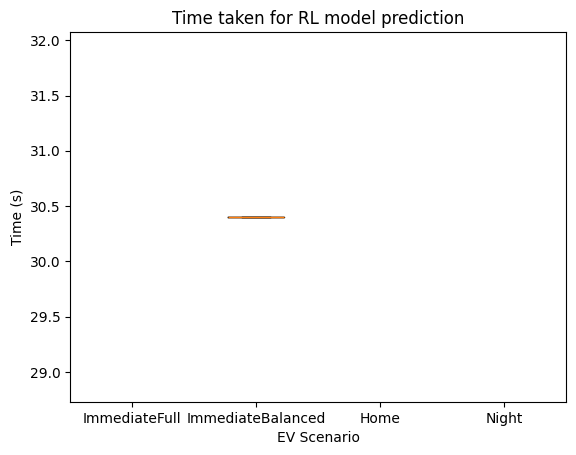

In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

n_case = 57
with open("Evaluation/Case%s/Case%s_metrics.pkl" %(n_case, n_case), 'rb') as f:
    dicts = pickle.load(f)
    
# for i in dicts:
#     for key in dict.keys():
#         i[key] = [ round(elem, 2) for elem in i[key] ]

Time = dicts[0]

# Prepare data for boxplot
data = [Time[key] for key in Time.keys()]
# plot boxplot

plt.figure()
plt.boxplot(data, labels=Time.keys())
plt.title("Time taken for RL model prediction")
plt.xlabel("EV Scenario")
plt.ylabel("Time (s)")
plt.show()


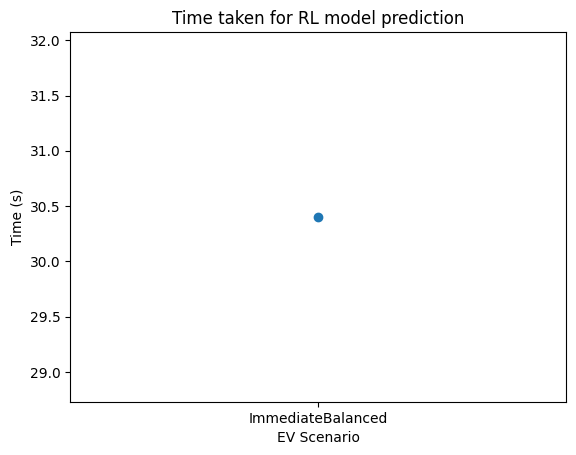

In [2]:
# Prepare data for scatter plot
x = []
y = []
for key in Time.keys():
    x.extend([key] * len(Time[key]))
    y.extend(Time[key])

# Plot scatter plot
plt.figure()
plt.scatter(x, y)
plt.title("Time taken for RL model prediction")
plt.xlabel("EV Scenario")
plt.ylabel("Time (s)")
plt.show()

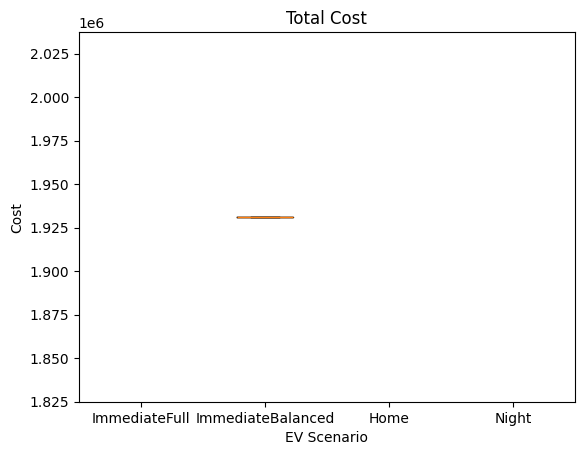

In [3]:
Costs = dicts[1]
# Prepare data for boxplot
data = [Costs[key] for key in Costs.keys()]
plt.figure()
plt.boxplot(data, labels=Costs.keys())
plt.title("Total Cost")
plt.xlabel("EV Scenario")
plt.ylabel("Cost")
plt.show()

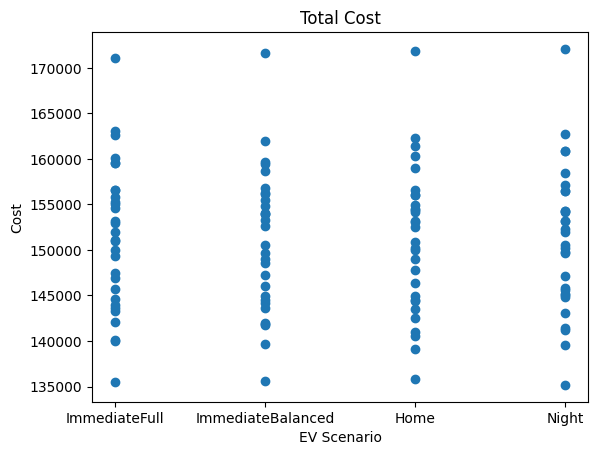

In [7]:
# Prepare data for scatter plot
x = []
y = []
for key in Costs.keys():
    x.extend([key] * len(Costs[key]))
    y.extend(Costs[key])

# Plot scatter plot
plt.figure()
plt.scatter(x, y)
plt.title("Total Cost")
plt.xlabel("EV Scenario")
plt.ylabel("Cost")
plt.show()


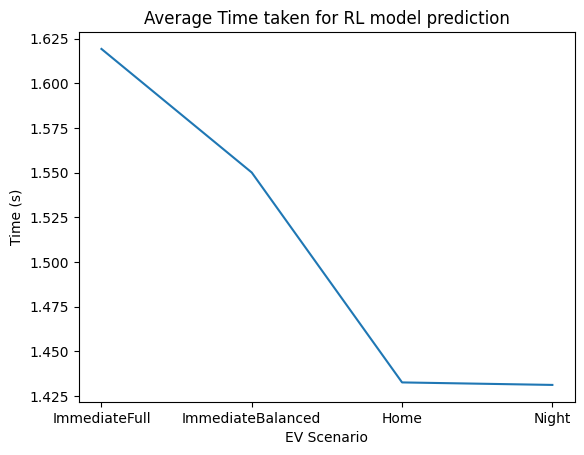

In [8]:
# Prepare data for line plot
x = []
y = []
for key in Time.keys():
    x.append(key)
    y.append(np.mean(Time[key]))

# Plot line plot
plt.figure()
plt.plot(x, y)
plt.title("Average Time taken for RL model prediction")
plt.xlabel("EV Scenario")
plt.ylabel("Time (s)")
plt.show()

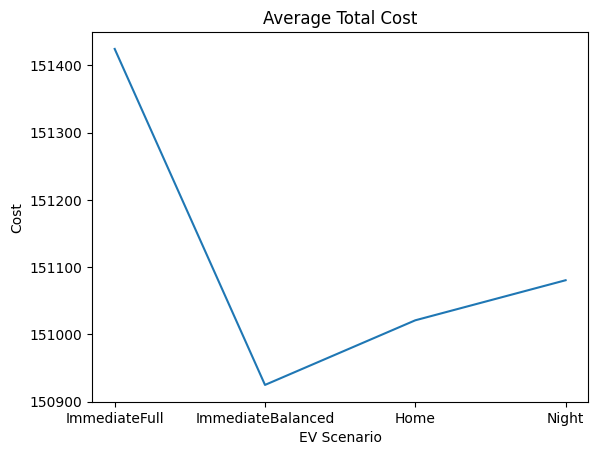

In [9]:
# Prepare data for line plot
x = []
y = []
for key in Costs.keys():
    x.append(key)
    y.append(np.mean(Costs[key]))

# Plot line plot
plt.figure()
plt.plot(x, y)
plt.title("Average Total Cost")
plt.xlabel("EV Scenario")
plt.ylabel("Cost")
plt.show()


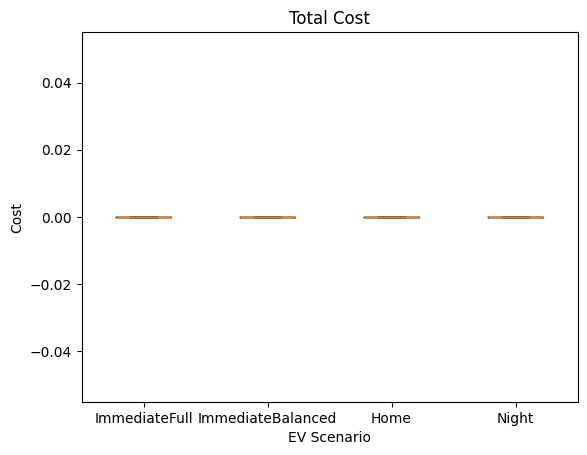

In [6]:
N_violations = dicts[2]
data = [N_violations[key] for key in N_violations.keys()]
plt.figure()
plt.boxplot(data, labels=N_violations.keys())
plt.title("Total Cost")
plt.xlabel("EV Scenario")
plt.ylabel("Cost")
plt.show()

Text(0, 0.5, '%')

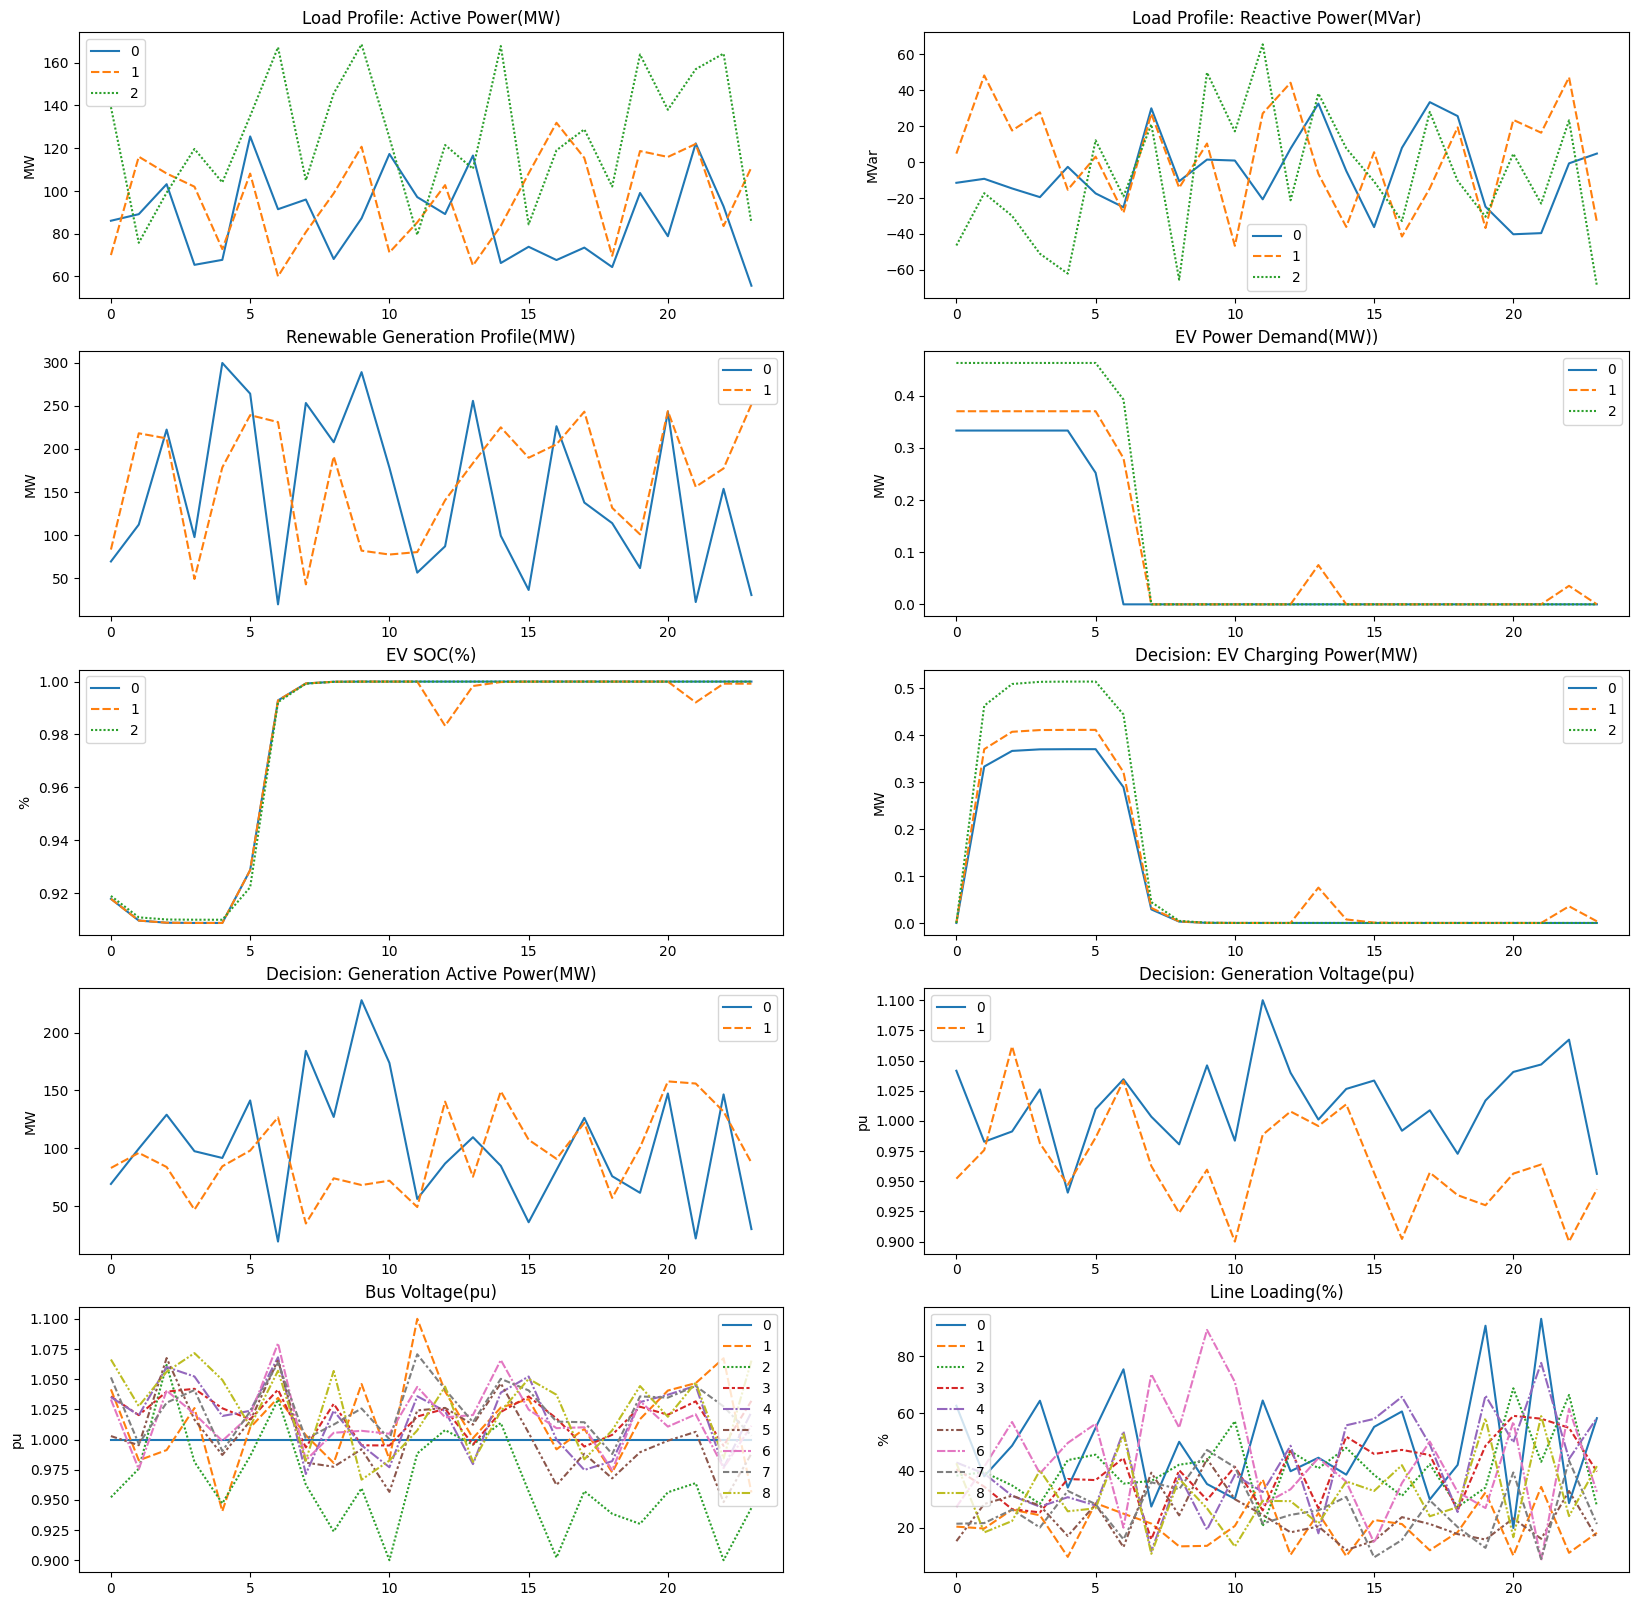

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

EVScenarios = ["ImmediateFull", "ImmediateBalanced", "Home", "Night"]
n_case = 9
i = EVScenarios[0]
df_load_p = pd.read_csv("../Evaluation/Case%s/Case%s_%s/load_p.csv"%(n_case,n_case,i))
df_load_q = pd.read_csv("../Evaluation/Case%s/Case%s_%s/load_q.csv"%(n_case,n_case,i))
df_renew = pd.read_csv("../Evaluation/Case%s/Case%s_%s/renewable.csv"%(n_case,n_case,i))
df_ev_demand = pd.read_csv("../Evaluation/Case%s/Case%s_%s/ev_demand.csv"%(n_case,n_case,i))
df_ev_soc = pd.read_csv("../Evaluation/Case%s/Case%s_%s/ev_soc.csv"%(n_case,n_case,i))
df_gen_p = pd.read_csv("../Evaluation/Case%s/Case%s_%s/gen_p.csv"%(n_case,n_case,i))
df_gen_v = pd.read_csv("../Evaluation/Case%s/Case%s_%s/gen_v.csv"%(n_case,n_case,i))
df_ev_action = pd.read_csv("../Evaluation/Case%s/Case%s_%s/ev_action.csv"%(n_case,n_case,i))
df_voltage = pd.read_csv("../Evaluation/Case%s/Case%s_%s/voltage.csv"%(n_case,n_case,i))
df_line_loading = pd.read_csv("../Evaluation/Case%s/Case%s_%s/line_loading.csv"%(n_case,n_case,i))

#define plotting region (5 rows, 5 columns)
fig, axes = plt.subplots(5, 2,figsize=(20,20))
sns.lineplot(data=df_load_p, ax=axes[0,0])
sns.lineplot(data=df_load_q, ax=axes[0,1])
sns.lineplot(data=df_renew, ax=axes[1,0])
sns.lineplot(data=df_ev_demand, ax=axes[1,1])
sns.lineplot(data=df_ev_soc, ax=axes[2,0])
sns.lineplot(data=df_ev_action, ax=axes[2,1])
sns.lineplot(data=df_gen_p, ax=axes[3,0])
sns.lineplot(data=df_gen_v, ax=axes[3,1])
sns.lineplot(data=df_voltage, ax=axes[4,0])
sns.lineplot(data=df_line_loading, ax=axes[4,1])

axes[0,0].set_title("Load Profile: Active Power(MW)")
axes[0,1].set_title("Load Profile: Reactive Power(MVar)")
axes[1,0].set_title("Renewable Generation Profile(MW)")
axes[1,1].set_title("EV Power Demand(MW))")
axes[2,0].set_title("EV SOC(%)")
axes[2,1].set_title("Decision: EV Charging Power(MW)")
axes[3,0].set_title("Decision: Generation Active Power(MW)")
axes[3,1].set_title("Decision: Generation Voltage(pu)")
axes[4,0].set_title("Bus Voltage(pu)")
axes[4,1].set_title("Line Loading(%)")


# axes.set_xlabel("Hour")
axes[0,0].set_ylabel("MW")
axes[0,1].set_ylabel("MVar")
axes[1,0].set_ylabel("MW")
axes[1,1].set_ylabel("MW")
axes[2,0].set_ylabel("%")
axes[2,1].set_ylabel("MW")
axes[3,0].set_ylabel("MW")
axes[3,1].set_ylabel("pu")
axes[4,0].set_ylabel("pu")
axes[4,1].set_ylabel("%")

In [25]:
df = pd.read_csv("../Data/German_EV/emobpy_timeseries_hourly.csv")
df.head()

/var/folders/w4/7lpv40nd2g79_r3by73bjd7c0000gn/T/ipykernel_795/2004322136.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/German_EV/emobpy_timeseries_hourly.csv")


,Unnamed: 0,ID,VehicleMobility,DrivingConsumption,GridAvailability,GridDemand_Immediate_full_capacity,GridDemand_Immediate_full_capacity.1,GridDemand_Immediate_balanced,GridDemand_Immediate_balanced.1,GridDemand_From_0_to_24_at_home,GridDemand_From_0_to_24_at_home.1,GridDemand_From_23_to_8_at_home,GridDemand_From_23_to_8_at_home.1
0,NaN,ID,Distance_km,Consumption_kWh,PowerRating_kW,Load_kW,SoC,Load_kW,SoC,Load_kW,SoC,Load_kW,SoC
1,date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 00:00:00,0.0,0.0,0.0,3.7,3.7,0.546,0.426,0.50525,0.426,0.50525,0.426,0.50525
3,2020-01-01 01:00:00,0.0,0.0,0.0,3.7,3.7,0.62,0.426,0.514,0.426,0.514,0.426,0.514
4,2020-01-01 02:00:00,0.0,0.0,0.0,3.7,3.7,0.694,0.426,0.5222500000000001,0.426,0.5222500000000001,0.426,0.5222500000000001


In [26]:
# df = pd.read_csv("../Data/German_EV/emobpy_timeseries_original.csv")
# Modify column names by appending the content of the first row
new_column_names = [f"{col}_{df.at[0, col]}" for col in df.columns]

# Assign the new column names to the DataFrame
df.columns = new_column_names

# Drop the first and second rows
df = df.drop([0, 1]).reset_index(drop=True)

# Define a conversion function to convert values into float or int
def convert_to_float_int(value):
    try:
        # Try to convert to float
        float_val = float(value)
        # If the float value is equivalent to an int, return as int
        if float_val.is_integer():
            return int(float_val)
        else:
            return float_val
    except ValueError:
        # Return the original value if conversion fails
        return value

# Apply the conversion function to each element in the DataFrame
df = df.map(convert_to_float_int)
df = df.rename(columns={"Unnamed: 0_nan":"Time", 
                        "ID_ID":"ID",
                        "VehicleMobility_Location":"Location",
                        "VehicleMobility.1_Distance_km":"Distance_km", 
                        "DrivingConsumption_Consumption_kWh":"DrivingConsumption_kWh",
                        "GridAvailability_ChargingStation":"ChargingStation",
                        "GridAvailability.1_PowerRating_kW":"ChargingAvailability_kW",
                        "GridDemand_Immediate_full_capacity_Load_kW":"ChargingPowerImmediateFull_kW",
                        "GridDemand_Immediate_full_capacity.1_SoC":"SOCImmediateFull",
                        "GridDemand_Immediate_balanced_Load_kW":"ChargingPowerImmediateBalanced_kW",
                        "GridDemand_Immediate_balanced.1_SoC":"SOCImmediateBalanced",
                        "GridDemand_From_0_to_24_at_home_Load_kW":"ChargingPowerHome_kW",
                        "GridDemand_From_0_to_24_at_home.1_SoC":"SOCHome",
                        "GridDemand_From_23_to_8_at_home_Load_kW":"ChargingPowerNight_kW",
                        "GridDemand_From_23_to_8_at_home.1_SoC":"SOCNight"})
# df = df[df["ID"] < net.load.index.size]
df = df[df["ID"] < 11]
df['Time'] = pd.to_datetime(df['Time'])
df["Time_step"] = (df['Time'].astype('int64') - df['Time'].astype('int64').min()) // (3600 * 10**9)

NameError: name 'net' is not defined

In [ ]:
df_multiIndexed = df.set_index(['ID', 'Time_step'])
df_multiIndexed

Time  VehicleMobility_Distance_km  \
ID Time_step                                                    
0  0         2020-01-01 00:00:00                          0.0   
   1         2020-01-01 01:00:00                          0.0   
   2         2020-01-01 02:00:00                          0.0   
   3         2020-01-01 03:00:00                          0.0   
   4         2020-01-01 04:00:00                          0.0   
...                          ...                          ...   
10 8755      2020-12-30 19:00:00                          0.0   
   8756      2020-12-30 20:00:00                          0.0   
   8757      2020-12-30 21:00:00                          0.0   
   8758      2020-12-30 22:00:00                          0.0   
   8759      2020-12-30 23:00:00                          0.0   

              DrivingConsumption_kWh  GridAvailability_PowerRating_kW  \
ID Time_step                                                            
0  0                             0.0                              3.7   
   1                             0.0                              3.7   
   2                             0.0                              3.7   
   3                             0.0                              3.7   
   4                             0.0                              3.7   
...                              ...                              ...   
10 8755                          0.0                              3.7   
   8756                          0.0                              3.7   
   8757                          0.0                              3.7   
   8758                          0.0                              3.7   
   8759                          0.0                              3.7   

              ChargingPowerImmediateFull_kW  SOCImmediateFull  \
ID Time_step                                                    
0  0                                    3.7             0.546   
   1                                    3.7             0.620   
   2                                    3.7             0.694   
   3                                    3.7             0.768   
   4                                    3.7             0.842   
...                                     ...               ...   
10 8755                                 0.0             1.000   
   8756                                 0.0             1.000   
   8757                                 0.0             1.000   
   8758                                 0.0             1.000   
   8759                                 0.0             1.000   

              ChargingPowerImmediateBalanced_kW  SOCImmediateBalanced  \
ID Time_step                                                            
0  0                                      0.426               0.50525   
   1                                      0.426               0.51400   
   2                                      0.426               0.52225   
   3                                      0.426               0.53100   
   4                                      0.426               0.53925   
...                                         ...                   ...   
10 8755                                   0.867               0.92525   
   8756                                   0.867               0.94225   
   8757                                   0.867               0.95950   
   8758                                   0.867               0.97650   
   8759                                   0.867               0.99350   

              ChargingPowerHome_kW  SOCHome  ChargingPowerNight_kW  SOCNight  
ID Time_step                                                                  
0  0                         0.426  0.50525                  0.426   0.50525  
   1                         0.426  0.51400                  0.426   0.51400  
   2                         0.426  0.52225                  0.426   0.52225  
   3                         0.426  0.531

In [4]:
def convertTuple(tup):
    str = '_'.join(tup)
    return str
for i in profiles.keys():
    a = convertTuple(i)
    if a == 'load_p_mw':
        load_pmw = profiles[i]
    elif a == 'load_q_mvar':
        load_qmvar = profiles[i]